<a href="https://colab.research.google.com/github/chhavitatia/EDA-Project/blob/main/CHHAVI's_Airbnb_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Airbnb Bookings Analysis**

**Project Type** - EDA

**Contribution** - Individual

# **Project Summary**

Airbnb is an American Company since 2007, it is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.


We have our dataset from AirBnb based on NY. NY is amongst the most expensive places to live in USA. We would like to perform an in-depth analysis on one of the most densely populated cities of world. Our dataset is feature rich containing, location with co-ordinates, prices, host name, room types, availability throughout season. From these features I’ve tried to extract information like most expensive places to live in NY, is location really varies with occupancy rate, what type of room people tends to choose most, is there any particular season for tourists or locale when we can follow a surge in prices or occupancy rate of properties etc.

We have performed data wrangling, handled n/a values, created new feature from last reviewed date.

# **GitHub Link**

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

# **General Guidelines : -**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# **1.Know Your Data**

## **Import Libraries**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Dataset Loading**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data by reading csv file
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 2/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

## **Dataset First View**

In [ ]:
#Understanding the Data using head() function
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## **Dataset Rows & Columns count**

In [ ]:
#checking the number of rows and columns using shape() method
airbnb_df.shape

(48895, 16)

## **Dataset Information**

In [ ]:
#useing info() method to get information about dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **About Dataset**

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

**We need to Explore and analyze the data to discover key understandings (not limited to these) such as :**

What can we learn about different hosts and areas?

What can we learn from predictions?

Distribution of listings across neighbourhoods?

How would your analysis be helpful to the stakeholders?

# **2.Understanding Your Variables**

In [ ]:
#use DataFrame.columns attribute to return the columns label
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Dataset Describe method to return the description of the dataframe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **Variables Description**

Ok, So we can see our dataset has 48895 data and 16 columns. Lets try to understand about the columns we've got here.
* id : a unique id identifying an airbnb lisitng
* name : name representing the accommodation
* host_id : a unique id identifying an airbnb host
* host_name : name under whom host is registered
* neighbourhood_group : a group of area
* neighbourhood : area falls under neighbourhood_group
* latitude : coordinate of listing
* longitude : coordinate of listing
* room_type : type to categorize listing rooms
* price : price of listing
* minimum_nights : the minimum nights required to stay in a single visit
* number_of_reviews : total count of reviews given by visitors
* last_review : date of last review given
* reviews_per_month : rate of reviews given per month
* calculated_host_listings_count : total no of listing registered under the host
* availability_365 : the number of days for which a host is available in a year.

# **3. Data Wrangling**

### **Missing Values/Null Values**



In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)

**Drop unnecessary columns**

Dropping columns which are not relevant to our analysis, ID can be removed as it would be unique for every rows. Similarly NAME can be dropped as showing host names in our analysis can expose sensitive data. LAST_REVIEW can also be dropped as it is not much significant

In [ ]:
#dropping columns not required
airbnb_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [ ]:
# inspecting data after the removal of unnecessary columns
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

Records for which the REVIEWS_PER_MONTH value is null, we can fill with zero for elementary analysis, assuming no review were given.



In [ ]:
# replacing null values of 'reviews_per_month' with zeros

airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

After handling the missing values, we do a further check to confirm no null values

In [ ]:
# confirming that there are non null values in our dataset
airbnb_df.isna().sum().sum()

0

Let's begin looking into our data by inspecting some interesting categorical unique values

In [ ]:
# checking for unique neighbourhood groups
print("\n".join(airbnb_df.neighbourhood_group.unique()))

Brooklyn
Manhattan
Queens
Staten Island
Bronx


We can see there are five neighbourhood groups into which all the localities have been divided.

We further check the number of unique neighbourhoods.



In [ ]:
# checking for sum of unique iterations in 'neighbourhood' field/ column
print(len(airbnb_df.neighbourhood.unique()))

221


# **4. Data Visualization & Experimenting with charts:**

### **Finding Total count of each room types**

Let's check the type of rooms available in the listings.

In [ ]:
# checking for unique values in 'room_type' field/ column
print("\n".join(airbnb_df.room_type.unique()))

Private room
Entire home/apt
Shared room


In [ ]:
# Which is the most listed room type?
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())

In [ ]:
airbnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

Text(0.5, 1.0, 'Room Type Counts')

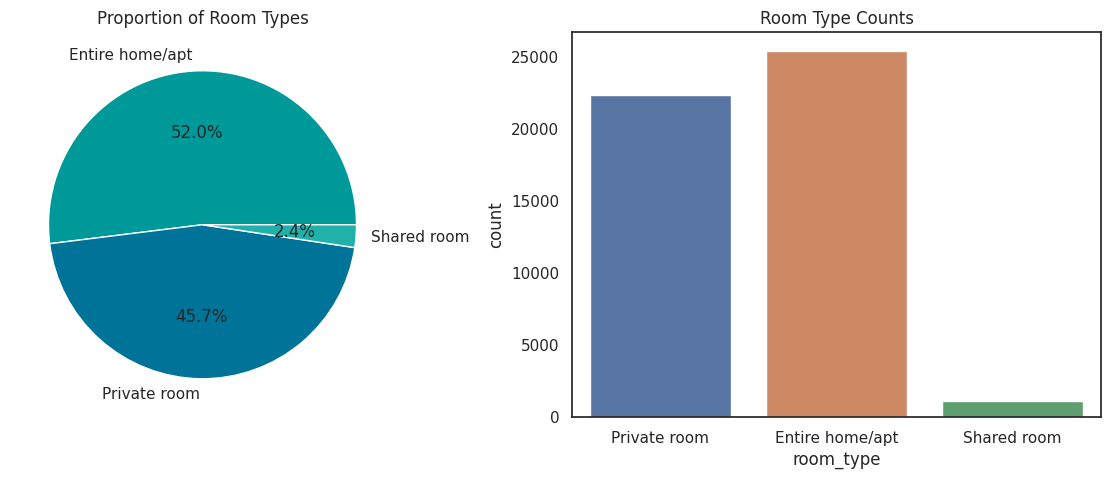

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax = axes.flatten()

labels = airbnb_df['room_type'].value_counts().index
sizes = airbnb_df['room_type'].value_counts().values
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[0].set_title('Proportion of Room Types')

sns.countplot(data=airbnb_df, x='room_type', ax=ax[1])
ax[1].set_title('Room Type Counts')


<Axes: xlabel='room_type', ylabel='price'>

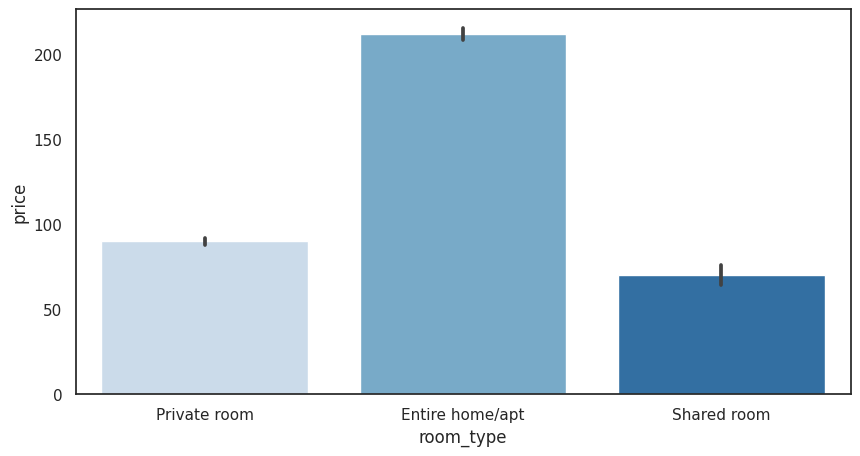

In [ ]:
room_type_price = sns.barplot(x='room_type', y='price', data= airbnb_df, palette='Blues')
room_type_price

### **Exploring and Visualizing Data**

We are now ready to explore the data statistically and to visualize the values of features and correlations between different features.

In [ ]:
#descriptive statistics on Airbnb prices
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The price data is heavily right skewed. We can conclude from our price desciption stats that there are huge number of outliers as the price at 75 percentile is 175 dollars but the max price is 10000 dollars.

Text(0.5, 1.0, 'Density plot for Price Distribution')

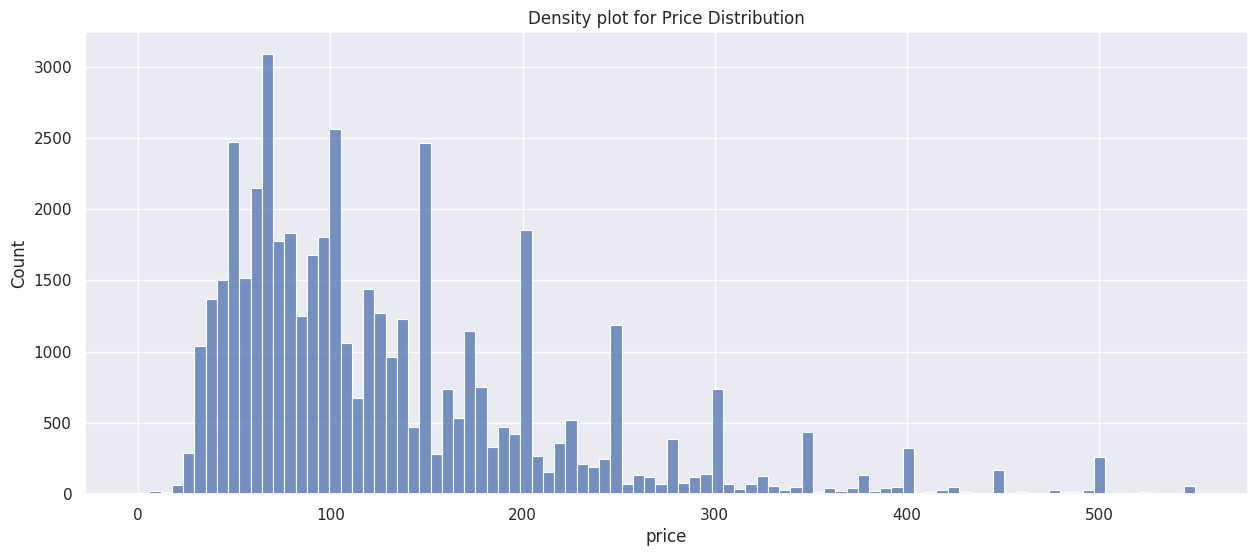

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
price_dist=sns.histplot(airbnb_df[airbnb_df['price']<=np.percentile(airbnb_df['price'],98)].price)
price_dist.set_title("Density plot for Price Distribution")

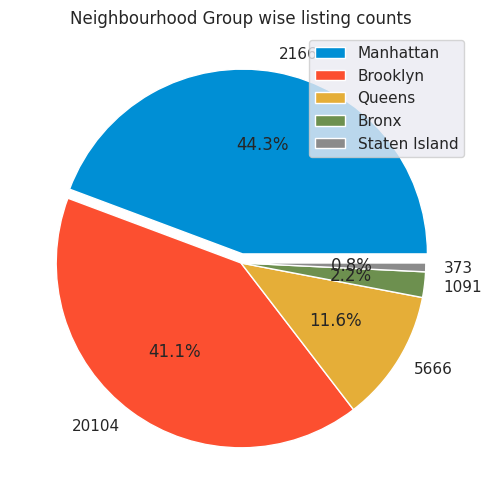

In [ ]:
#Visualize the proportion of the listing count on each region area using the ‘neighbourhood_group’ columns

neighbourhood_group_counts=airbnb_df.neighbourhood_group.value_counts()
group_names = neighbourhood_group_counts.index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.05,0,0,0,0)
group_counts = neighbourhood_group_counts.values

plt.figure(figsize=(6,6))
plt.pie(group_counts, explode = explode, labels=group_counts, colors= colors, autopct = '%1.1f%%', startangle=0,)
plt.legend(group_names)
plt.title('Neighbourhood Group wise listing counts')
plt.show()

Firstly, we can check the distribution of listings across different neighbourhoods. We can see a nice pie-chart depicting the counts as well as the percentages of listings. It is very well evident that Manhattan has the most number of listings followed by Brooklyn.

## **Analyzing the prices across neighbourhoods**

In [ ]:
# Let's discover the relationship between the 'neighbourhood_group's and 'price'
airbnb_df[airbnb_df.price < 550].pivot_table(index='neighbourhood_group',values='price',aggfunc='median').sort_values('price',ascending=False).reset_index()

,neighbourhood_group,price
0,Manhattan,145
1,Brooklyn,90
2,Queens,75
3,Staten Island,75
4,Bronx,65


<Axes: xlabel='neighbourhood_group', ylabel='price'>

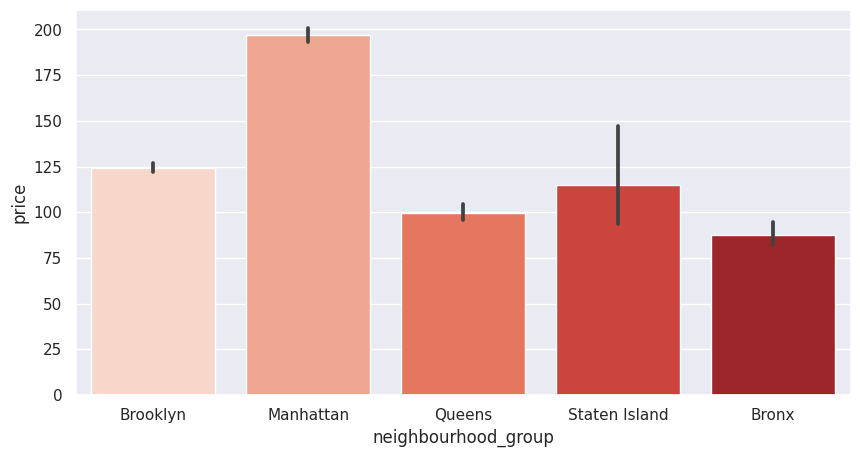

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
neighbourhood_group_price = sns.barplot(x='neighbourhood_group', y='price', data= airbnb_df, palette='Reds')
neighbourhood_group_price

## Finding Relation between neighbourhood group and availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

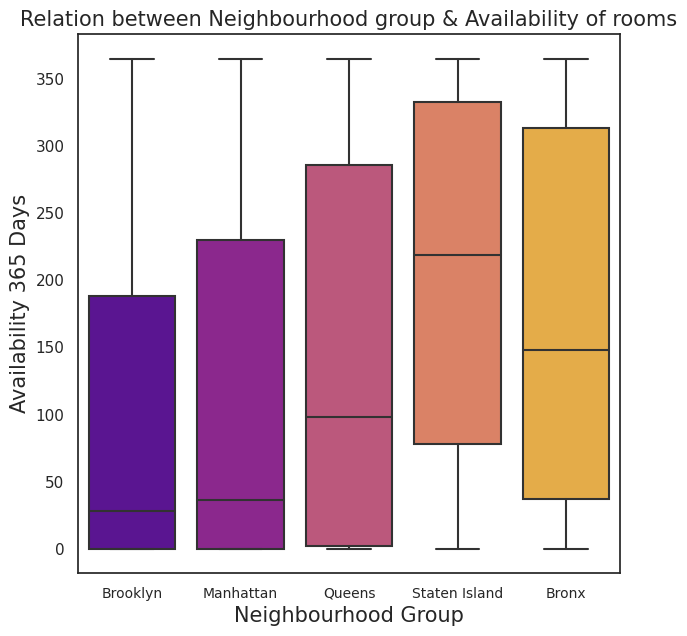

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style('white')

ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '10')

## Airbnb distribution across all neighbourhoods

In [ ]:
#finding top 10 'neighbourhood's
airbnb_df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

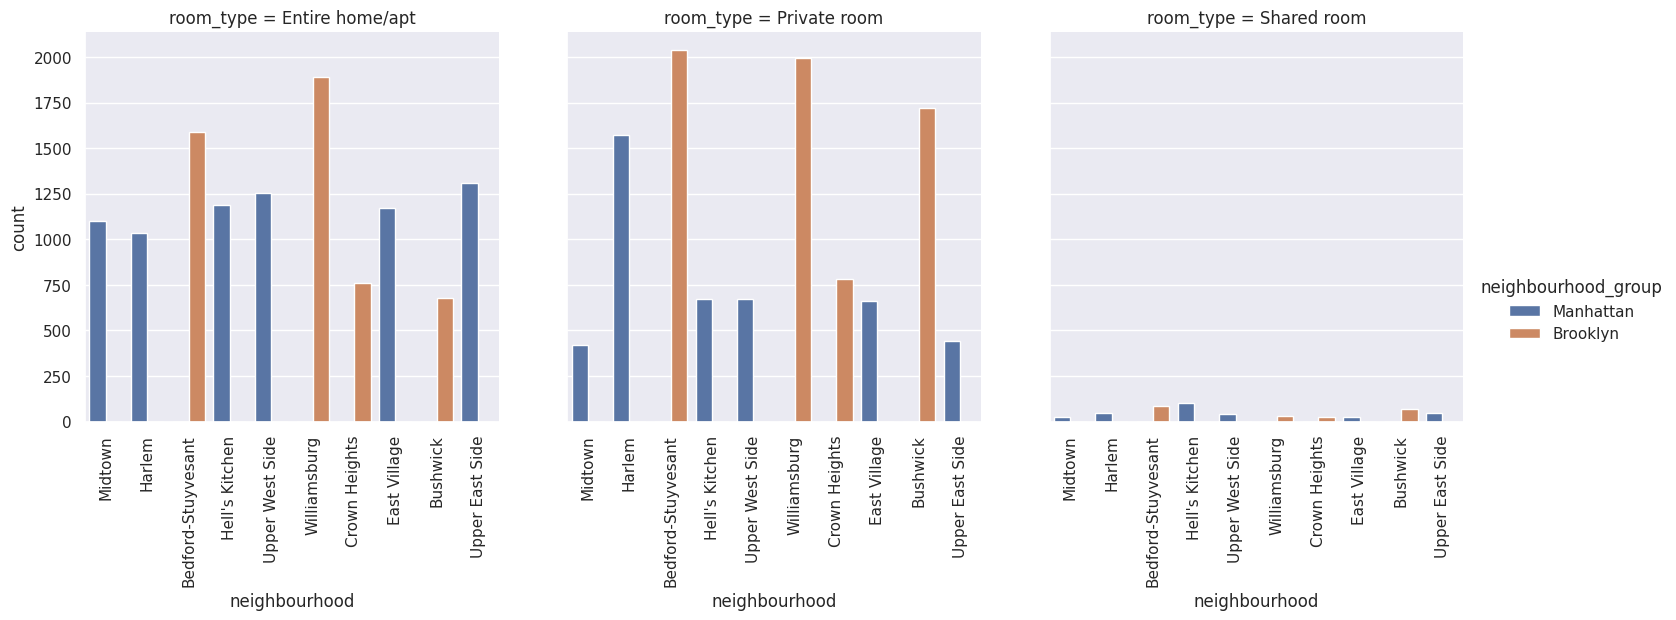

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
df_top_neighbourhood=airbnb_df[airbnb_df['neighbourhood'].isin(airbnb_df.neighbourhood.value_counts().head(10).index)]
viz_neighbourhood_room_type = sns.catplot(x='neighbourhood',
                                          hue='neighbourhood_group',
                                          col='room_type',
                                          data=df_top_neighbourhood,
                                          kind='count')
viz_neighbourhood_room_type.set_xticklabels(rotation=90)

Let us take some useful inferences from above plot

Popular neighbourhoods where the density of **Entire home/apt are more** than that of Private rooms

*   Midtown
*   Hell's Kitchen
*   Upper West Side
*   East Village
*   Upper East Side

Popular neighbourhoods where the density of **Private rooms are more** than that of Entire home/apt

*   Harlem
*   Bedford-Stuyvesant
*   Williamsburg
*   Crown Heights
*   Bushwick

In case, if the **search is for Shared rooms** the following neighbourhoods can be considered

*   Bedford-Stuyvesant
*   Hell's Kitchen
*   Bushwick

## **Identifying the Hosts with most number of listings and their listed areas**

In this section, we would be analyzing the listing patterns of the hosts who have most number of listings. It would be good to find the areas in which they list mostly and the room types they provide as service.

In [ ]:
# calculate the number of listings each host has
host_listing_counts=pd.DataFrame(airbnb_df['host_id'].value_counts().reset_index())
host_listing_counts['host_id'].describe()

count    37457.000000
mean         1.305363
std          2.760747
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: host_id, dtype: float64

In [ ]:
top_host_df=airbnb_df[['host_id']].value_counts().sort_values(ascending=False).head(40).reset_index().rename(columns={0:'listing_count'})
top_host_df.head()

,host_id,listing_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


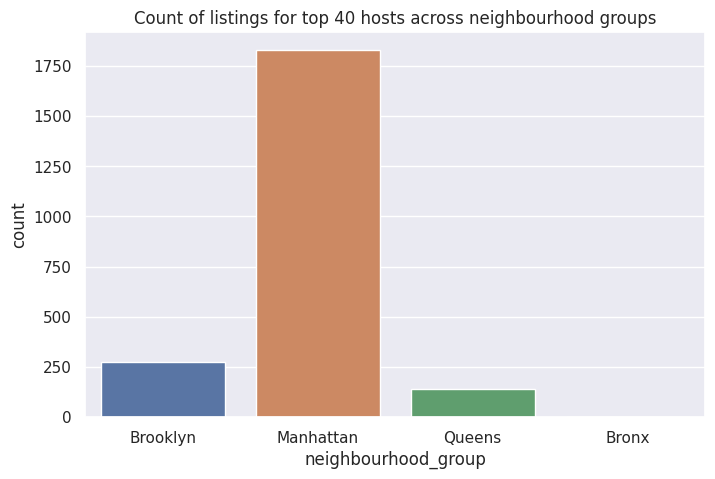

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
plot_neigh_grp_wise_count=sns.countplot(data=airbnb_df[airbnb_df['host_id'].isin(top_host_df.host_id)],x='neighbourhood_group')
plot_neigh_grp_wise_count.set_title("Count of listings for top 40 hosts across neighbourhood groups");

In [ ]:
# Percentage wise distribution of listings across neighbourhood groups for top hosts
df_top_host_prcrnt_dist_locality=airbnb_df[airbnb_df['host_id'].isin(top_host_df.host_id)].groupby(['host_id','neighbourhood_group']).agg({'price':['count']}).groupby(level=0).apply(lambda x:round(100 * x / x.sum())).reset_index()
#df_top_host_prcrnt_dist_locality.head(5)

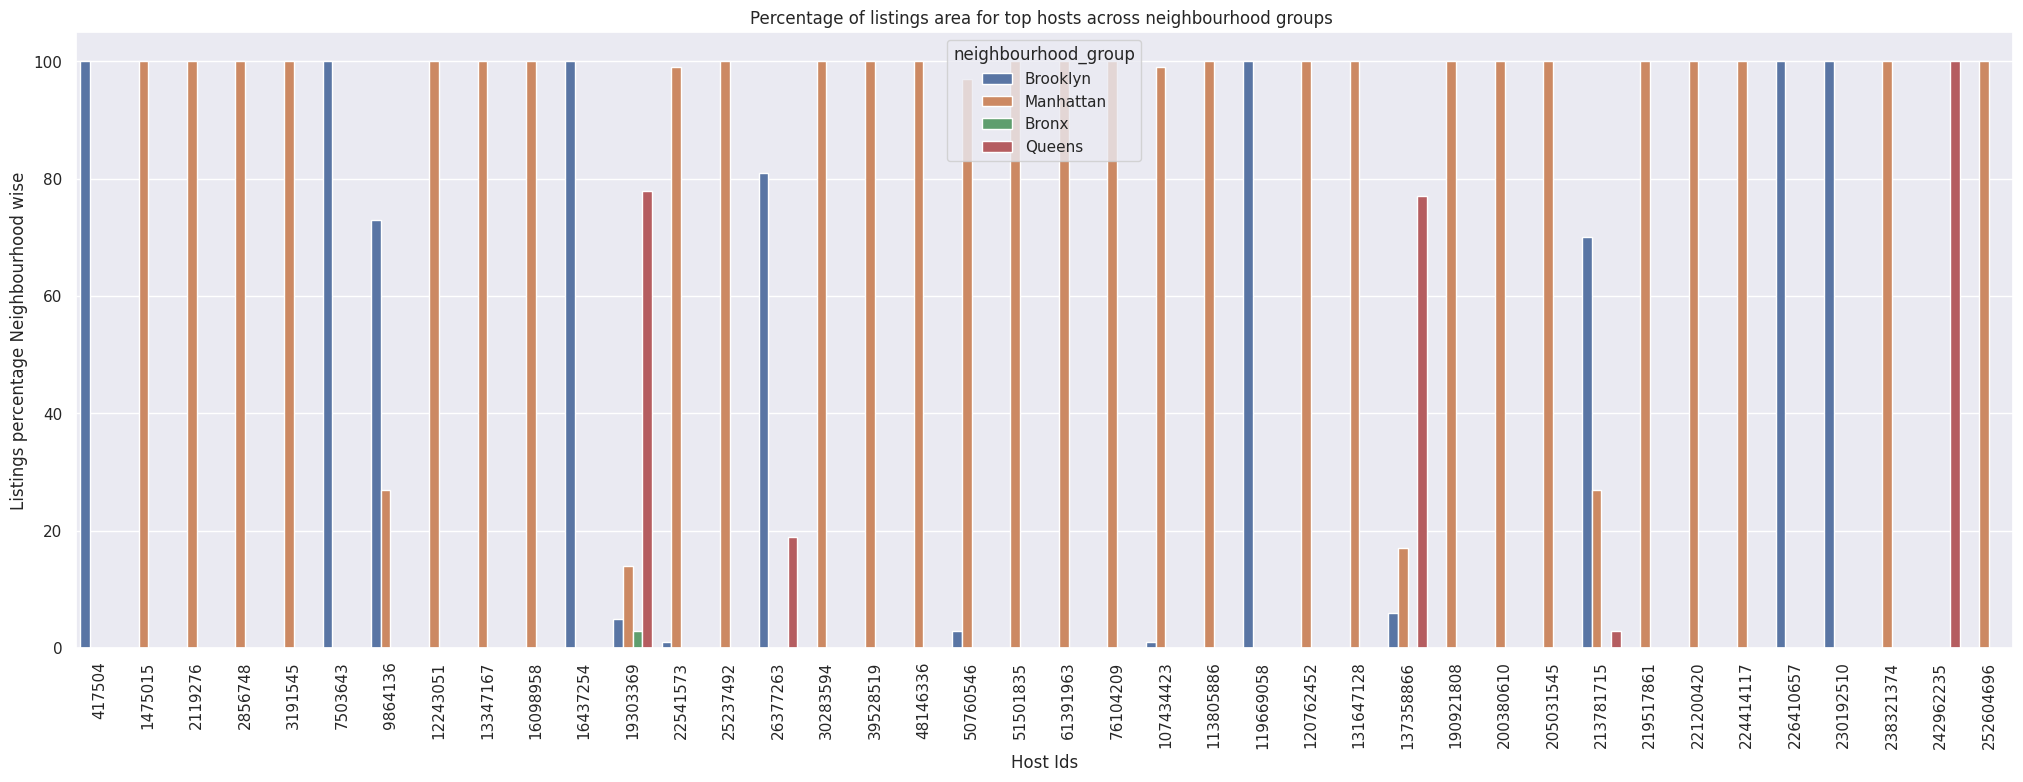

In [ ]:
#The %age wise distribution of listings in diff areas has been plotted for the top hosts.

sns.set(rc={'figure.figsize':(25,8)})

top_host_listing_areawise_graph=sns.barplot(x='host_id',y=('price','count'),hue='neighbourhood_group',data=df_top_host_prcrnt_dist_locality)#
top_host_listing_areawise_graph.set_title("Percentage of listings area for top hosts across neighbourhood groups ")


top_host_listing_areawise_graph.set_xticklabels(labels=top_host_listing_areawise_graph.get_xticklabels(), rotation=90)
top_host_listing_areawise_graph.set_xlabel('Host Ids')
top_host_listing_areawise_graph.set_ylabel('Listings percentage Neighbourhood wise');

We can say that out of top 40 hosts, most of them have their listings completely in Manhattan. The second in the top list of areas is Brooklyn.

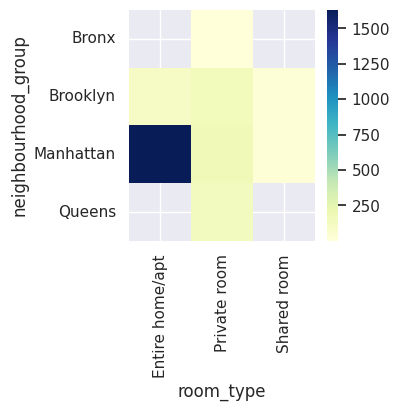

In [ ]:
# Heatmap for top hosts across neighbourhood group and room type
plt.figure(figsize=(3,3))
top_host_count_neigh_wise=airbnb_df[airbnb_df['host_id'].isin(top_host_df.host_id)].pivot_table(index='neighbourhood_group',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(top_host_count_neigh_wise,cmap='YlGnBu')
plt.show()

This heat map clearly depicts that majority of the listings of top hosts across different neighbourhoods is Entire home/apt.



## **Analysis about the room types across neighbourhood groups.**

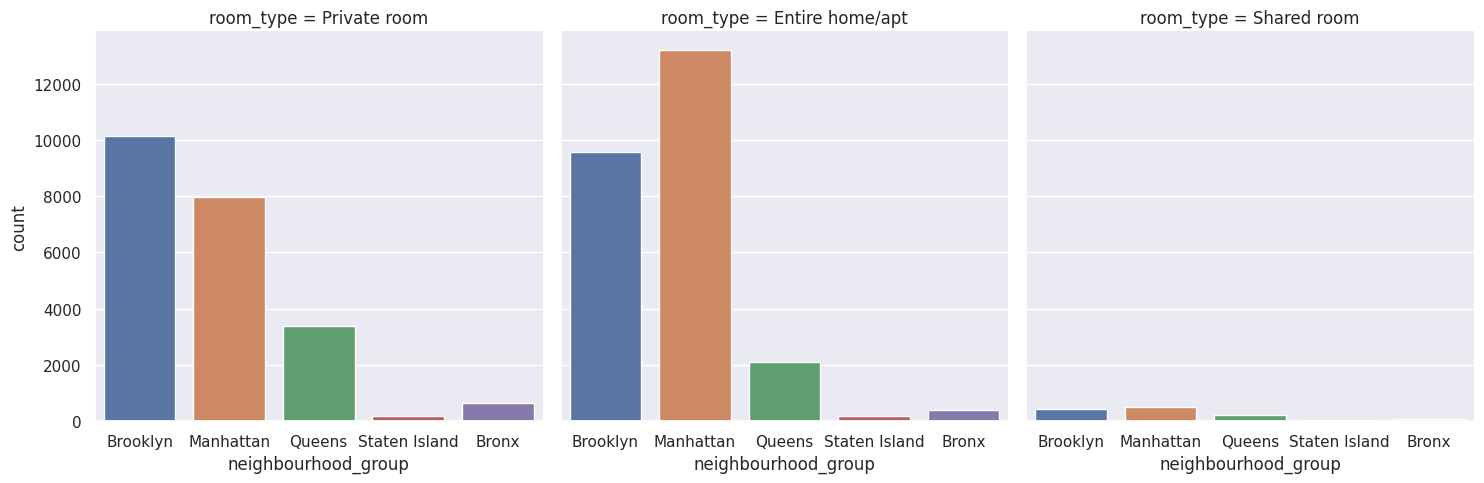

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plot_neigh_room_wise=sns.catplot(data=airbnb_df,x='neighbourhood_group',kind='count',col='room_type');

From this plot it is evident that "Entire home" type is more popular in Manhattan and this might be the reason why top hosts have most of this type of listings. But interestig thing to note is that in Brooklyn Private rooms are more popular.

# **5. Solution to Business Objective**

The main business objective of Airbnb is **"To create a world where anyone can belong anywhere"**. The solution to fulfill its objective is:

 * By providing hassle_free services to travelers in all cities of different countries at minimal prices.

 * Using customer reviews to build a loyal customer base & enhance their brand reputation.


# **Conclusions**

So, basically in this notebook we did some exploratory data analysis, handled the missing values & did visualization to understand it better.

From our analysis it is evident that Mnahattan and Brooklyn are the neighbourhood groups with most number of Airbnb rooms. As well as, it can be seen that the room types mostly is either Entire home or Private rooms. Furthermore, with respect to prices it can be concluded that Manhattan has the highest median price followed by Brooklyn. We also saw how the number of reviews across neighbourhoods strengthen our findings that Manhattan and Brooklyn are most popular.

This analysis can be helpful for a new host who wants to enter into business with Airbnb. He can quickly conclude which areas are more in demand and the room types that are mostly preferred by customers allowing him to setup his business in these particular aspects only. It can also benefit existing hosts to understand profitable neighbourhoods. This analysis would also help someone visiting New York, giving him an idea about the price range for different room types across neighbourhoods. He can choose based on his requirements and also the demographic analysis can help him choose localities which would be convinient for him.
